# H1B petition 

## Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [2]:
data = pd.read_csv('h1b_kaggle.csv')
data = data.dropna(axis = 0, how = 'any')
data.head(10)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
5,6,CERTIFIED-WITHDRAWN,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,"MIAMI, FLORIDA",-80.191790,25.761680
6,7,CERTIFIED-WITHDRAWN,BT AND MK ENERGY AND COMMODITIES,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,91021.0,2016.0,"HOUSTON, TEXAS",-95.369803,29.760427
7,8,CERTIFIED-WITHDRAWN,"GLOBO MOBILE TECHNOLOGIES, INC.",CHIEF EXECUTIVES,CHIEF OPERATIONS OFFICER,Y,150000.0,2016.0,"SAN JOSE, CALIFORNIA",-121.886329,37.338208
9,10,WITHDRAWN,LESSARD INTERNATIONAL LLC,CHIEF EXECUTIVES,PRESIDENT,Y,154648.0,2016.0,"VIENNA, VIRGINIA",-77.265260,38.901222
10,11,CERTIFIED-WITHDRAWN,H.J. HEINZ COMPANY,CHIEF EXECUTIVES,"CHIEF INFORMATION OFFICER, HEINZ NORTH AMERICA",Y,182978.0,2016.0,"PITTSBURGH, PENNSYLVANIA",-79.995886,40.440625


In [3]:
data.size

31655415

#### Number of H1B by case status

CERTIFIED                                             2512114
CERTIFIED-WITHDRAWN                                    195721
DENIED                                                  85161
WITHDRAWN                                               84752
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    1
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

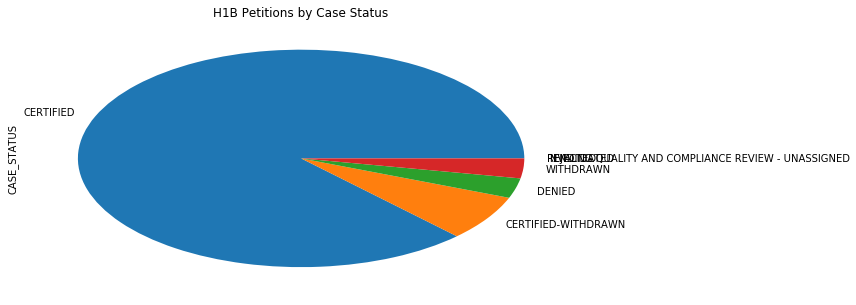

In [4]:
plt.rcParams["figure.figsize"] = (10,5)
(data.CASE_STATUS.value_counts(normalize=True)*100).plot(kind='pie',title='H1B Petitions by Case Status')
data.CASE_STATUS.value_counts()

In [5]:
data = data.replace('CERTIFIED-WITHDRAWN', 'CERTIFIED')
data = data.replace('WITHDRAWN', 'DENIED')
data = data.replace('REJECTED', 'DENIED')
data = data[data['CASE_STATUS'] != 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED']
data = data[data['CASE_STATUS'] != 'INVALIDATED']

CERTIFIED    2707835
DENIED        169914
Name: CASE_STATUS, dtype: int64

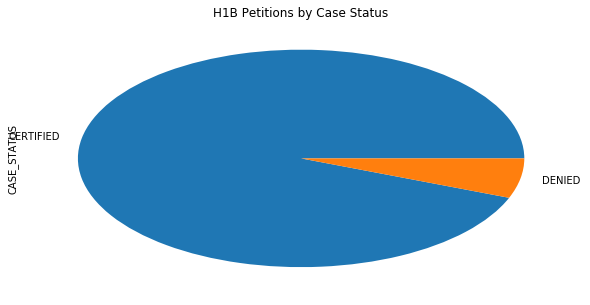

In [6]:
plt.rcParams["figure.figsize"] = (10,5)
(data.CASE_STATUS.value_counts(normalize=True)*100).plot(kind='pie',title='H1B Petitions by Case Status')
data.CASE_STATUS.value_counts()

#### Approval rate by year

In [7]:
df1 = data.groupby(['YEAR', 'CASE_STATUS'])
df1.size()

YEAR    CASE_STATUS
2011.0  CERTIFIED      298475
        DENIED          35150
2012.0  CERTIFIED      365404
        DENIED          28863
2013.0  CERTIFIED      400510
        DENIED          21902
2014.0  CERTIFIED      472052
        DENIED          25974
2015.0  CERTIFIED      571560
        DENIED          28560
2016.0  CERTIFIED      599834
        DENIED          29465
dtype: int64

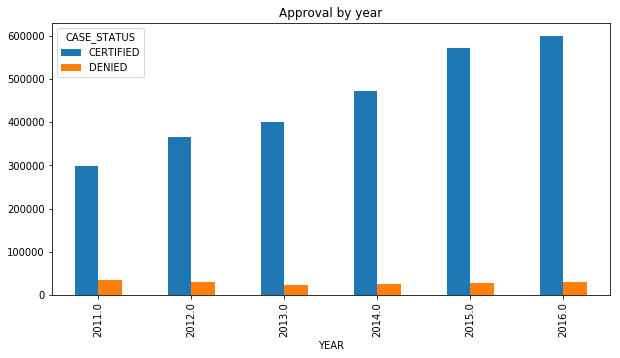

In [8]:
df1.size().unstack().plot(kind = 'bar', title = "Approval by year")

#### top 15 Companies that petitions the most H1B over the years

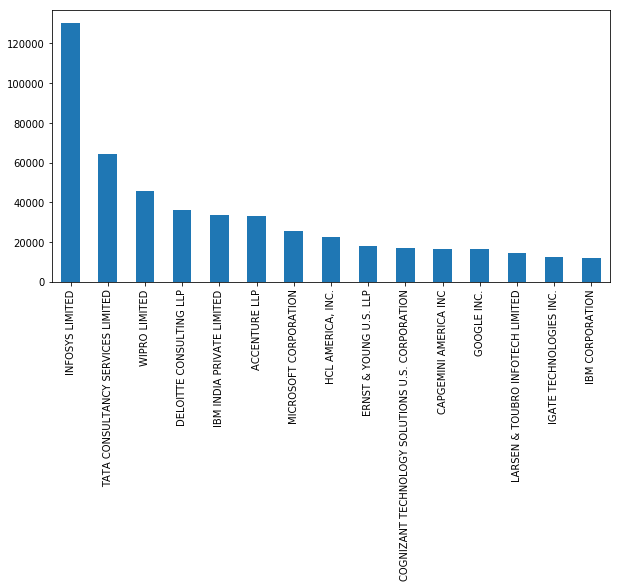

In [9]:
data['EMPLOYER_NAME'].value_counts().nlargest(15).plot(kind="bar")

In [10]:
plt.rcParams["figure.figsize"] = (10,5)
data['EMPLOYER_NAME'].value_counts().nlargest(15)
df2 = data[data['EMPLOYER_NAME'].isin(['INFOSYS LIMITED','TATA CONSULTANCY SERVICES LIMITED','WIPRO LIMITED',
                                 'DELOITTE CONSULTING LLP','IBM INDIA PRIVATE LIMITED','ACCENTURE LLP','MICROSOFT CORPORATION',
                                'HCL AMERICA, INC.', 'ERNST & YOUNG U.S. LLP','COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION',
                                'GOOGLE INC.'])]
df2.groupby(['EMPLOYER_NAME','YEAR','CASE_STATUS']).size()

EMPLOYER_NAME                                    YEAR    CASE_STATUS
ACCENTURE LLP                                    2011.0  CERTIFIED       1224
                                                         DENIED            24
                                                 2012.0  CERTIFIED       2580
                                                         DENIED            21
                                                 2013.0  CERTIFIED       4957
                                                         DENIED            16
                                                 2014.0  CERTIFIED       5457
                                                         DENIED            19
                                                 2015.0  CERTIFIED       9494
                                                         DENIED            70
                                                 2016.0  CERTIFIED       9314
                                                         DENIED          

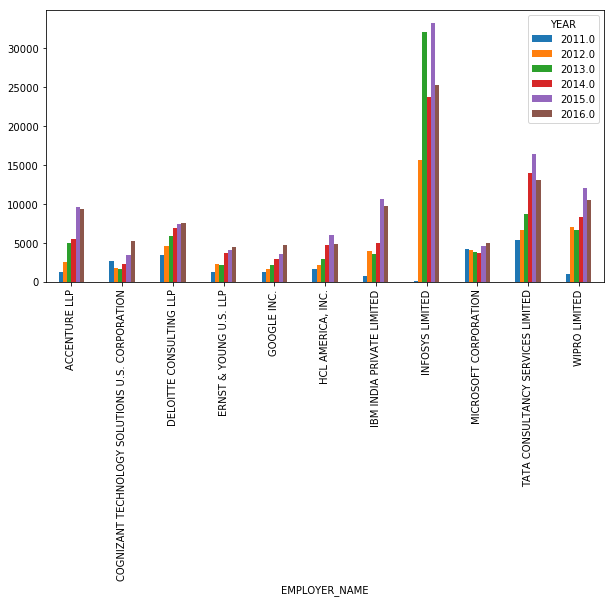

In [43]:
plt.rcParams["figure.figsize"] = (10,5)
df2.groupby(['EMPLOYER_NAME','YEAR']).size().unstack().plot(kind = 'bar')

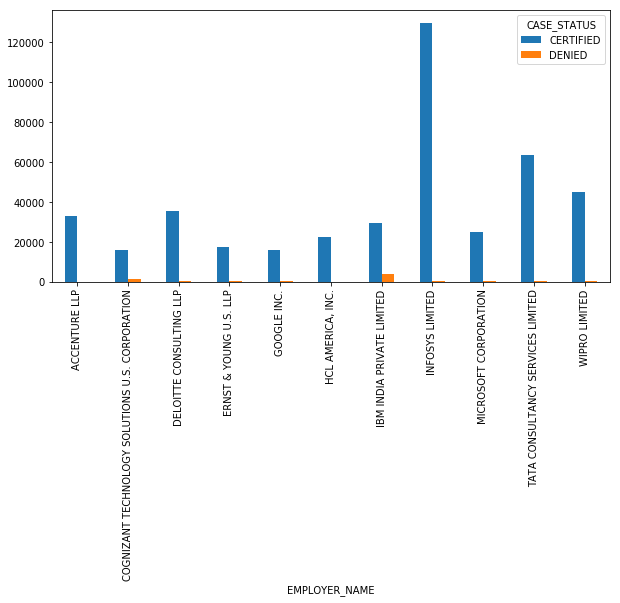

In [11]:
plt.rcParams["figure.figsize"] = (10,5)
df2.groupby(['EMPLOYER_NAME','CASE_STATUS']).size().unstack().plot(kind = 'bar')

## Data Processing

In [12]:
data.head(1000)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.00,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.00,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.00,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.00,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,DENIED,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.40,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
5,6,CERTIFIED,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.00,2016.0,"MIAMI, FLORIDA",-80.191790,25.761680
6,7,CERTIFIED,BT AND MK ENERGY AND COMMODITIES,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,91021.00,2016.0,"HOUSTON, TEXAS",-95.369803,29.760427
7,8,CERTIFIED,"GLOBO MOBILE TECHNOLOGIES, INC.",CHIEF EXECUTIVES,CHIEF OPERATIONS OFFICER,Y,150000.00,2016.0,"SAN JOSE, CALIFORNIA",-121.886329,37.338208
9,10,DENIED,LESSARD INTERNATIONAL LLC,CHIEF EXECUTIVES,PRESIDENT,Y,154648.00,2016.0,"VIENNA, VIRGINIA",-77.265260,38.901222
10,11,CERTIFIED,H.J. HEINZ COMPANY,CHIEF EXECUTIVES,"CHIEF INFORMATION OFFICER, HEINZ NORTH AMERICA",Y,182978.00,2016.0,"PITTSBURGH, PENNSYLVANIA",-79.995886,40.440625
